# WeatherPy


### Collect cities weather data


### Plot the data

* Temperature (F) vs. Latitude

* Humidity (%) vs. Latitude

* Cloudiness (%) vs. Latitude

* Wind Speed (mph) vs. Latitude


### Linear regression

* North/South Hemisphere : Temperature (F) vs. Latitude

* North/South Hemisphere : Humidity (%) vs. Latitude

* North/South Hemisphere : Cloudiness (%) vs. Latitude

* North/South Hemisphere : Wind Speed (mph) vs. Latitude


In [48]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities_weathers.csv"

## Collect cities weather data
----

### Generate Cities List

In [7]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

599

### Perform API Calls

* Perform a weather check on each city using a series of successive API calls.

In [8]:
weather_url = "http://api.openweathermap.org/data/2.5/weather?q="

# To store the weather informations
city_id = []
city_list = []
country = []
date = [] 
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []

for i in range(len(cities)):
    
    city_name = '+'.join(cities[i].split(' '))

    city_query_url = weather_url + city_name + "&appid=" + weather_api_key
    city_data = requests.get(city_query_url).json()

    try:
        print(f"It's being processed: {i}-th city = {city_data['name']}:")
        # Retrieve city info and weather informations
        city_id.append(city_data['id'])
        city_list.append(city_data['name'])
        country.append(city_data['sys']['country'])
        date.append(city_data['dt'])
        lat.append(city_data['coord']['lat'])
        lng.append(city_data['coord']['lon'])
        max_temp.append(city_data['main']['temp_max'])
        humidity.append(city_data['main']['humidity'])
        cloudiness.append(city_data['clouds']['all'])
        wind_speed.append(city_data['wind']['speed'])
    except KeyError:
        print(f"Found error : {i}-th city = {city_name} not found")
    

It's being processed: 0-th city = Albany:
It's being processed: 1-th city = Provideniya:
It's being processed: 2-th city = Qaanaaq:
It's being processed: 3-th city = Jamestown:
It's being processed: 4-th city = Asău:
It's being processed: 5-th city = Yerbogachën:
It's being processed: 6-th city = Broome:
It's being processed: 7-th city = Meulaboh:
It's being processed: 8-th city = Hobart:
It's being processed: 9-th city = Ribeira Grande:
It's being processed: 10-th city = Hermanus:
It's being processed: 11-th city = Mayumba:
Found error : 12-th city = thilogne not found
It's being processed: 13-th city = Port Blair:
It's being processed: 14-th city = Pisco:
It's being processed: 15-th city = Kaitangata:
It's being processed: 16-th city = Tiksi:
It's being processed: 17-th city = Auki:
It's being processed: 18-th city = Samarai:
It's being processed: 19-th city = Punta Arenas:
It's being processed: 20-th city = George Town:
It's being processed: 21-th city = Vredendal:
Found error : 22-

It's being processed: 182-th city = Takanosu:
It's being processed: 183-th city = Riyadh:
It's being processed: 184-th city = Luganville:
It's being processed: 185-th city = Santa Vitória do Palmar:
It's being processed: 186-th city = Tiarei:
It's being processed: 187-th city = Charters Towers:
It's being processed: 188-th city = Banda Aceh:
It's being processed: 189-th city = San Juan:
It's being processed: 190-th city = Saint-Augustin:
It's being processed: 191-th city = Ponta do Sol:
It's being processed: 192-th city = Hamilton:
It's being processed: 193-th city = Belaya Gora:
It's being processed: 194-th city = Redlands:
It's being processed: 195-th city = Parrita:
It's being processed: 196-th city = Constitución:
It's being processed: 197-th city = Honiara:
It's being processed: 198-th city = Sargūr:
It's being processed: 199-th city = Saint George:
It's being processed: 200-th city = Praia da Vitória:
It's being processed: 201-th city = Severo-Kuril'sk:
It's being processed: 202-

It's being processed: 359-th city = Kharp:
It's being processed: 360-th city = Pangody:
It's being processed: 361-th city = Boden:
It's being processed: 362-th city = East London:
It's being processed: 363-th city = Makakilo City:
It's being processed: 364-th city = Sabha:
It's being processed: 365-th city = Yenotayevka:
It's being processed: 366-th city = Buchanan:
Found error : 367-th city = kawana+waters not found
Found error : 368-th city = saleaula not found
It's being processed: 369-th city = Hong Kong:
It's being processed: 370-th city = Sungai Raya:
It's being processed: 371-th city = Okakarara:
It's being processed: 372-th city = Arai:
It's being processed: 373-th city = Angoche:
It's being processed: 374-th city = Vila Velha:
It's being processed: 375-th city = Savannah Bight:
It's being processed: 376-th city = Ushtobe:
It's being processed: 377-th city = Harper:
It's being processed: 378-th city = Geraldton:
It's being processed: 379-th city = Puerto Madryn:
It's being proc

It's being processed: 536-th city = Tutóia:
It's being processed: 537-th city = Port Hedland:
It's being processed: 538-th city = Vallenar:
It's being processed: 539-th city = Tamboril:
It's being processed: 540-th city = Tabou:
It's being processed: 541-th city = Omboué:
It's being processed: 542-th city = Coquimbo:
It's being processed: 543-th city = Sidi Ali:
It's being processed: 544-th city = Kozhva:
It's being processed: 545-th city = Lima:
It's being processed: 546-th city = Kununurra:
It's being processed: 547-th city = Toowoomba:
It's being processed: 548-th city = Klaksvík:
It's being processed: 549-th city = Qasigiannguit:
It's being processed: 550-th city = Fairbanks:
It's being processed: 551-th city = Whitehorse:
It's being processed: 552-th city = Buin:
It's being processed: 553-th city = Tarakan:
It's being processed: 554-th city = Susuman:
It's being processed: 555-th city = Rodolfo Sánchez Taboada:
It's being processed: 556-th city = Dukat:
It's being processed: 557-t

### Convert Raw Data to DataFrame

* Export the city data into a .csv.
* Display the DataFrame

In [49]:
# Set the raw dat to dataframe with unit conversion temp (K->F), wind_speed (m/s -> mph)
weather_df = pd.DataFrame({
    'City ID' : city_id,
    'City' : city_list,
    'Country' : country,
    'Date' : date,
    'Lat' : lat,
    'Lng' : lng,
    'Max Temp (F)' : [(k - 273.15) * (9/5) + 32 for k in max_temp],
    'Humidity' : humidity,
    'Cloudiness' : cloudiness,
    'Wind Speed (mph)' : [ws*2.2369 for ws in wind_speed]})

# Export file as a CSV, without the Pandas index, but with the header
weather_df.to_csv(output_data_file, index=False, header=True)

In [50]:
weather_df.head()

,City ID,City,Country,Date,Lat,Lng,Max Temp (F),Humidity,Cloudiness,Wind Speed (mph)
0,5106841,Albany,US,2020-07-14,42.60,-73.97,73.004,71,32,7.471246
1,4031574,Provideniya,RU,2020-07-14,64.38,-173.30,50.000,81,90,13.421400
2,3831208,Qaanaaq,GL,2020-07-14,77.48,-69.36,41.522,72,1,2.773756
3,5122534,Jamestown,US,2020-07-14,42.10,-79.24,62.600,82,1,4.697490
4,686090,Asău,RO,2020-07-14,46.43,26.40,57.200,71,19,2.236900


In [51]:
city_weather_df.count()

City ID         542
City            542
Country         542
Date            542
Lat             542
Lng             542
Max Temp (F)    542
Humidity        542
Cloudiness      542
Wind Speed      542
dtype: int64

### Inspect the data and remove the cities where the humidity > 100%.


In [16]:
#  Get the indices of cities that have humidity over 100%.
humid_cities = weather_df.loc[weather_df['Humidity']>100]
if len(humid_cities.index) == 0:
    print("There are no cities that have humidity more than 100%")
else:
    weather_df.drop(humid_cities.index, inplace=True)
    weather_df.to_csv(output_data_file, index=False, header=True)

There are no cities that have humidity more than 100%


In [23]:
# Get the observed date
date = pd.to_datetime(weather_df['Date'],unit='s')[0].date()

## Plot the Data
----

### Latitude vs. Temperature Plot

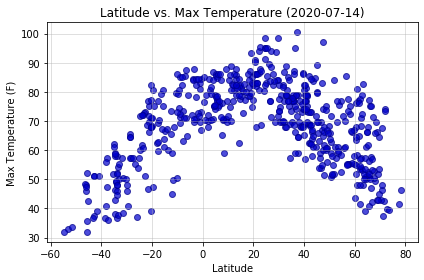

In [25]:
# Save xval=latitude and yval=max temperature
xval = weather_df['Lat']
yval = weather_df['Max Temp (F)']
plt.scatter(xval, yval, facecolor='mediumblue', alpha= 0.7, edgecolors='darkblue')
plt.grid(alpha=0.5)
plt.title(f"Latitude vs. Max Temperature ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.tight_layout()
plt.savefig("output_data/lat_temperature")
plt.show()

Overall, the points form a concave down parabola with the vertex at the latitude 20. This tells that the equater is not the hottest location. The higher termperatures are shown in the slightly northern area from the equater.

### Latitude vs. Humidity Plot

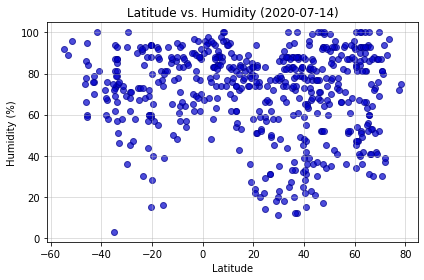

In [29]:
xval = weather_df['Lat']
yval = weather_df['Humidity']
plt.scatter(xval, yval, facecolor='mediumblue', alpha= 0.7, edgecolors='darkblue')
plt.grid(alpha=0.5)
plt.title(f"Latitude vs. Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.tight_layout()
plt.savefig("output_data/lat_humidity")
plt.show()

The above plot shows the relationship between the humidity and the latitude. The points at the equater appear in the high humidity range. Overall, it seems there is no relation between the humidity and the latitude.

### Latitude vs. Cloudiness Plot

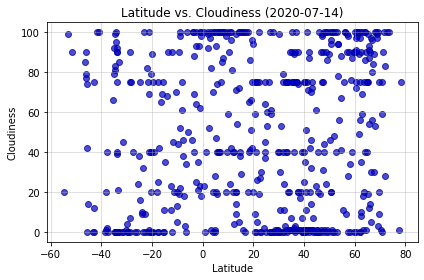

In [31]:
# Set the xval=latitude, yval=cli.
xval = weather_df['Lat']
yval = weather_df['Cloudiness']
plt.scatter(xval, yval, facecolor='mediumblue', alpha= 0.7, edgecolors='darkblue')
plt.grid(alpha=0.5)
plt.title(f"Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.tight_layout()
plt.savefig("output_data/lat_cloudiness")
plt.show()

The plot above shows the relationship between the cloudiness and the latitude. The points are spread out. It is hard to see any relation between the cloudiness and the latitude.

### Latitude vs. Wind Speed Plot

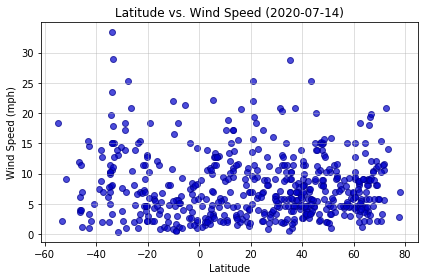

In [52]:
# Set the xval=latitude, yval=wind speed.
xval = weather_df['Lat']
yval = weather_df['Wind Speed (mph)']
plt.scatter(xval, yval, facecolor='mediumblue', alpha= 0.7, edgecolors='darkblue')
plt.grid(alpha=0.5)
plt.title(f"Latitude vs. Wind Speed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.tight_layout()
plt.savefig("output_data/lat_windspeed")
plt.show()

The points on the plot show the wind speed of the cities is generally linear relationship to the latitude with almost zero slope. It seems the wind speed overall similar throught the latitudes.

## Linear Regression
----

In [33]:
# Create a function to create Linear Regression plots
def subplot_linregression(ax, xval, yval):
    
    (mm,cc,rr,pp,ss) = linregress(xval,yval)
    line_eq = "y = " + str(round(mm,2)) + " x + " + str(round(cc,2))
    est_yval = mm*xval + cc
    
    ax.plot(xval, est_yval, "r-")
    ax.annotate(line_eq, (5, 205), color="red", xycoords='axes points', size=12)
    ax.scatter(xval, yval, facecolor='mediumblue', alpha= 0.7, edgecolors='darkblue')    
    ax.set_xlabel("Latitude")
    
    return rr

In [56]:
# Create Northern and Southern Hemisphere DataFrames
north_df = weather_df.loc[weather_df['Lat']>0]
south_df = weather_df.loc[weather_df['Lat']<0]

###  Max Temp vs. Latitude Linear Regression

* North Hemisphere
* South Hemisphere

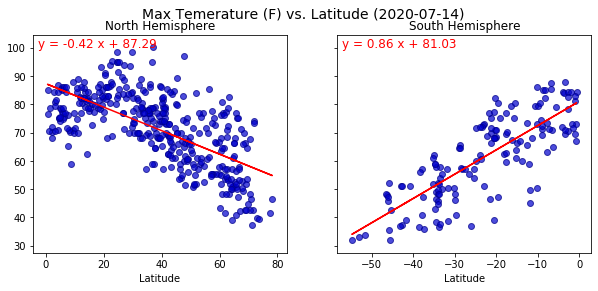

The r-sq of North Hemisphere are 0.42433976518773414
The r-sq of South Hemisphere are 0.6334928919815652


In [57]:
# Set the figure for the linear regression plots
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(10,4))
fig.suptitle(f"Max Temerature (F) vs. Latitude ({date})", size=14)

# Subplot for the north hemisphere
ax1.set_title("North Hemisphere")
n_rr = subplot_linregression(ax1, north_df['Lat'], north_df['Max Temp (F)'])

# Subplot for the north hemisphere
ax2.set_title("South Hemisphere")
s_rr = subplot_linregression(ax2, south_df['Lat'], south_df['Max Temp (F)'])
                
plt.show()

# Print the r-squared value
print(f"The r-sq of North Hemisphere are {n_rr**2}")
print(f"The r-sq of South Hemisphere are {s_rr**2}")

The equations of the linear regressions are given on the top left corner. The models tell

* North Hemisphere: The temperature decreases 0.42 F for one latitude increase and the temperature near the equator is 87.20 F. The $r^2=0.42$ means that the linear regression explains 42% of the observed variance in the temperature.

* South Hemisphere: The temperature decreases 0.86 F for one latitude decrease and the temperature near the equator is 81.03 F. The $r^2=0.63$ means that the linear regression explains 63% of the observed variance in the temperature.

###  Humidity (%) vs. Latitude Linear Regression

* North Hemisphere
* South Hemisphere

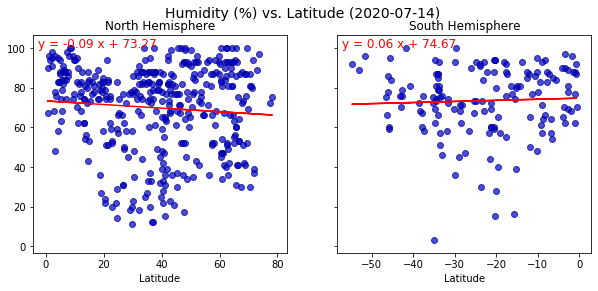

The r-sq of North Hemisphere are 0.006922315874854903
The r-sq of South Hemisphere are 0.0018617707308094345


In [58]:
# Set the figure for the linear regression plots
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(10,4))
fig.suptitle(f"Humidity (%) vs. Latitude ({date})", size=14)

# Subplot for the north hemisphere
ax1.set_title("North Hemisphere")
n_rr = subplot_linregression(ax1, north_df['Lat'], north_df['Humidity'])

# Subplot for the north hemisphere
ax2.set_title("South Hemisphere")
s_rr = subplot_linregression(ax2, south_df['Lat'], south_df['Humidity'])
                
plt.show()

# Print the r-squared value
print(f"The r-sq of North Hemisphere are {n_rr**2}")
print(f"The r-sq of South Hemisphere are {s_rr**2}")

The equations of the linear regressions are given on the top left corner. The models tell

* North Hemisphere: The humidity increases 0.09% for one latitude increase and the humidity near the equator is 73.77%. The $r^2=0.007$ means that the linear regression explains only 0.7% of the observed variance in the humidity data.

* South Hemisphere: The humidity decreases 0.06% for one latitude decrease and the humidity near the equator is 74.67%. The $r^2=0.002$ means that the linear regression explains only 0.2% of the observed variance in the humidity data.

###  Cloudiness (%) vs. Latitude Linear Regression

* North Hemisphere
* South Hemisphere

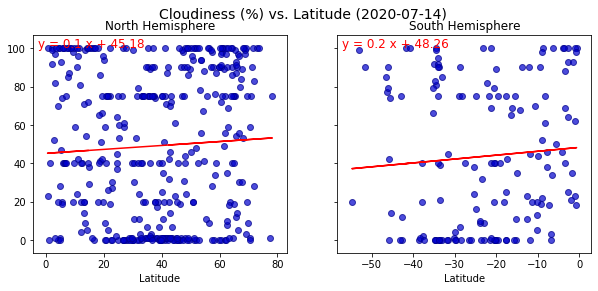

The r-sq of North Hemisphere are 0.0028650333524780883
The r-sq of South Hemisphere are 0.005592094212939261


In [59]:
# Set the figure for the linear regression plots
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(10,4))
fig.suptitle(f"Cloudiness (%) vs. Latitude ({date})", size=14)

# Subplot for the north hemisphere
ax1.set_title("North Hemisphere")
n_rr = subplot_linregression(ax1, north_df['Lat'], north_df['Cloudiness'])

# Subplot for the north hemisphere
ax2.set_title("South Hemisphere")
s_rr = subplot_linregression(ax2, south_df['Lat'], south_df['Cloudiness'])
                
plt.show()

# Print the r-squared value
print(f"The r-sq of North Hemisphere are {n_rr**2}")
print(f"The r-sq of South Hemisphere are {s_rr**2}")

The equations of the linear regressions are given on the top left corner. The models tell

* North Hemisphere: The cloudiness increases 0.1% for one latitude increase and the cloudiness near the equator is 45.18%. The $r^2=0.0028$ means that the linear regression explains only 0.28% of the observed variance in the cloudiness data.

* South Hemisphere: The cloudiness decreases 0.2% for one latitude decrease and the cloudiness near the equator is 48.26%. The $r^2=0.0055$ means that the linear regression explains only 0.55% of the observed variance in the cloudiness data.

###  Wind Speed (mph) vs. Latitude Linear Regression

* North Hemisphere
* South Hemisphere

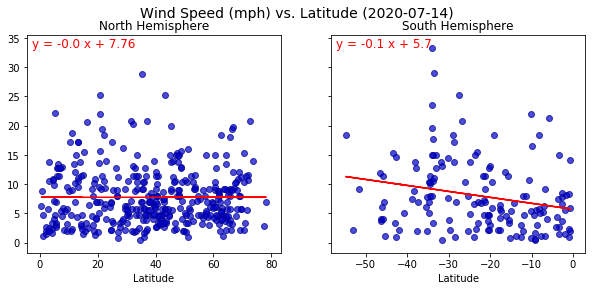

The r-sq of North Hemisphere are 6.368751715643645e-08
The r-sq of South Hemisphere are 0.05129980635114854


In [60]:
# Set the figure for the linear regression plots
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(10,4))
fig.suptitle(f"Wind Speed (mph) vs. Latitude ({date})", size=14)

# Subplot for the north hemisphere
ax1.set_title("North Hemisphere")
n_rr = subplot_linregression(ax1, north_df['Lat'], north_df['Wind Speed (mph)'])

# Subplot for the north hemisphere
ax2.set_title("South Hemisphere")
s_rr = subplot_linregression(ax2, south_df['Lat'], south_df['Wind Speed (mph)'])
                
plt.show()

# Print the r-squared value
print(f"The r-sq of North Hemisphere are {n_rr**2}")
print(f"The r-sq of South Hemisphere are {s_rr**2}")

The equations of the linear regressions are given on the top left corner. The models tell

* North Hemisphere: The wind speed stays same for one latitude increase and the wind speed near the equator is 3.47mph. The $r^2=6.37\cdot 10^{-8}$ means that the linear regression explains almost 0% of the observed variance in the wind speed data.

* South Hemisphere: The wind speed increases 0.05mph for one latitude decrease and the wind speed near the equator is 2.55mph. The $r^2=0.05$ means that the linear regression explains only 5% of the observed variance in the wind speed data.